Importing the Dependencies

In [826]:
import pandas as pd
import matplotlib.pylab as plt
from streamlit_option_menu import option_menu
%matplotlib inline
import cufflinks as cf
import numpy as np
import plotly
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [827]:
# test_import.py
from sklearn import datasets
print("scikit-learn is installed correctly")


scikit-learn is installed correctly


Data Collection and Processing

In [828]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heartdataset.csv')

In [829]:
# print first 5 rows of the dataset
heart_data.head()

Patient Id  age  Gender  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0           1   63       1   3       145   233    1        0      150      0   
1           2   37       1   2       130   250    0        1      187      0   
2           3   41       0   1       130   204    0        0      172      0   
3           4   56       1   1       120   236    0        1      178      0   
4           5   57       0   0       120   354    0        1      163      1   

   oldpeak  slope   ca  thal  target Level  
0      2.3    0.0  0.0   1.0     1.0  High  
1      3.5    0.0  0.0   2.0     1.0   Low  
2      1.4    2.0  0.0   2.0     1.0   Low  
3      0.8    2.0  0.0   2.0     1.0  High  
4      0.6    2.0  0.0   2.0     1.0  High

In [830]:
# print last 5 rows of the dataset
heart_data.tail()

Patient Id  age  Gender  cp  trestbps  chol  fbs  restecg  thalach  \
4226        4227   59       1   2       130   131    0        1      115   
4227        4228   41       1   2       130   236    0        0      174   
4228        4229   54       1   0       144   193    1        1      141   
4229        4230   39       1   2       130   131    0        1      115   
4230        4231   34       1   1       130   236    0        0      174   

      exang  oldpeak  slope   ca  thal  target Level  
4226      1      1.2    1.0  1.0   3.0     0.0   Low  
4227      0      0.0    1.0  1.0   2.0     0.0  High  
4228      0      3.4    1.0  0.0   1.0     1.0   Low  
4229      1      1.2    1.0  1.0   2.0     1.0  High  
4230      0      0.0    1.0  1.0   2.0     1.0   Low

In [831]:
# number of rows and columns in the dataset
heart_data.shape

(4231, 16)

In [832]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient Id  4231 non-null   int64  
 1   age         4231 non-null   int64  
 2   Gender      4231 non-null   int64  
 3   cp          4231 non-null   int64  
 4   trestbps    4231 non-null   int64  
 5   chol        4231 non-null   int64  
 6   fbs         4231 non-null   int64  
 7   restecg     4231 non-null   int64  
 8   thalach     4231 non-null   int64  
 9   exang       4231 non-null   int64  
 10  oldpeak     4231 non-null   float64
 11  slope       4201 non-null   float64
 12  ca          4201 non-null   float64
 13  thal        4201 non-null   float64
 14  target      4201 non-null   float64
 15  Level       4231 non-null   object 
dtypes: float64(5), int64(10), object(1)
memory usage: 529.0+ KB


In [833]:
heart_data.drop(['Patient Id'],axis = 1,inplace=True)

In [834]:
heart_data.head()

age  Gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63       1   3       145   233    1        0      150      0      2.3   
1   37       1   2       130   250    0        1      187      0      3.5   
2   41       0   1       130   204    0        0      172      0      1.4   
3   56       1   1       120   236    0        1      178      0      0.8   
4   57       0   0       120   354    0        1      163      1      0.6   

   slope   ca  thal  target Level  
0    0.0  0.0   1.0     1.0  High  
1    0.0  0.0   2.0     1.0   Low  
2    2.0  0.0   2.0     1.0   Low  
3    2.0  0.0   2.0     1.0  High  
4    2.0  0.0   2.0     1.0  High

In [835]:
heart_data['Level']

0       High
1        Low
2        Low
3       High
4       High
        ... 
4226     Low
4227    High
4228     Low
4229    High
4230     Low
Name: Level, Length: 4231, dtype: object

In [836]:
heart_data['Level'].replace('Medium','High',inplace=True)

In [837]:
heart_data['Level'].replace('High','1',inplace=True)
heart_data['Level'].replace('Low','0',inplace=True)


In [838]:
heart_data.head()

age  Gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63       1   3       145   233    1        0      150      0      2.3   
1   37       1   2       130   250    0        1      187      0      3.5   
2   41       0   1       130   204    0        0      172      0      1.4   
3   56       1   1       120   236    0        1      178      0      0.8   
4   57       0   0       120   354    0        1      163      1      0.6   

   slope   ca  thal  target Level  
0    0.0  0.0   1.0     1.0     1  
1    0.0  0.0   2.0     1.0     0  
2    2.0  0.0   2.0     1.0     0  
3    2.0  0.0   2.0     1.0     1  
4    2.0  0.0   2.0     1.0     1

In [839]:
heart_data['Level'] = pd.to_numeric(heart_data['Level'])

In [840]:
heart_data.isnull()

age  Gender     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False   False  False     False  False  False    False    False  False   
1     False   False  False     False  False  False    False    False  False   
2     False   False  False     False  False  False    False    False  False   
3     False   False  False     False  False  False    False    False  False   
4     False   False  False     False  False  False    False    False  False   
...     ...     ...    ...       ...    ...    ...      ...      ...    ...   
4226  False   False  False     False  False  False    False    False  False   
4227  False   False  False     False  False  False    False    False  False   
4228  False   False  False     False  False  False    False    False  False   
4229  False   False  False     False  False  False    False    False  False   
4230  False   False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   thal  target  Level  
0       False  False  False  False   False  False  
1       False  False  False  False   False  False  
2       False  False  False  False   False  False  
3       False  False  False  False   False  False  
4       False  False  False  False   False  False  
...       ...    ...    ...    ...     ...    ...  
4226    False  False  False  False   False  False  
4227    False  False  False  False   False  False  
4228    False  False  False  False   False  False  
4229    False  False  False  False   False  False  
4230    False  False  False  False   False  False  

[4231 rows x 15 columns]

In [841]:
heart_data.isnull().any()

age         False
Gender      False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope        True
ca           True
thal         True
target       True
Level       False
dtype: bool

In [842]:
# checking for missing values
heart_data.isnull().sum()

age          0
Gender       0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope       30
ca          30
thal        30
target      30
Level        0
dtype: int64

In [843]:
# statistical measures about the data
heart_data.describe()

age       Gender           cp     trestbps         chol  \
count  4231.000000  4231.000000  4231.000000  4231.000000  4231.000000   
mean     54.288584     0.705507     0.941385   131.944221   245.917041   
std       8.920063     0.455868     1.019603    17.261997    52.124904   
min      25.000000     0.000000     0.000000    94.000000   126.000000   
25%      47.000000     0.000000     0.000000   120.000000   211.000000   
50%      55.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   274.000000   
max      77.000000     1.000000     3.000000   245.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  4231.000000  4231.000000  4231.000000  4231.000000  4231.000000   
mean      0.152446     0.549279   149.033089     0.338218     1.070196   
std       0.359495     0.523553    22.766651     0.473159     1.169540   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.500000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   165.000000     1.000000     1.800000   
max       1.000000     2.000000   247.000000     1.000000     6.200000   

             slope           ca         thal       target        Level  
count  4201.000000  4201.000000  4201.000000  4201.000000  4231.000000  
mean      1.401809     0.743156     2.332540     0.553440     0.484755  
std       0.614845     1.015108     0.613429     0.497195     0.499827  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000     0.000000  
75%       2.000000     1.000000     3.000000     1.000000     1.000000  
max       3.000000     4.000000     3.000000     1.000000     1.000000

In [844]:
#checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1.0    2325
0.0    1876
Name: count, dtype: int64

<Axes: >

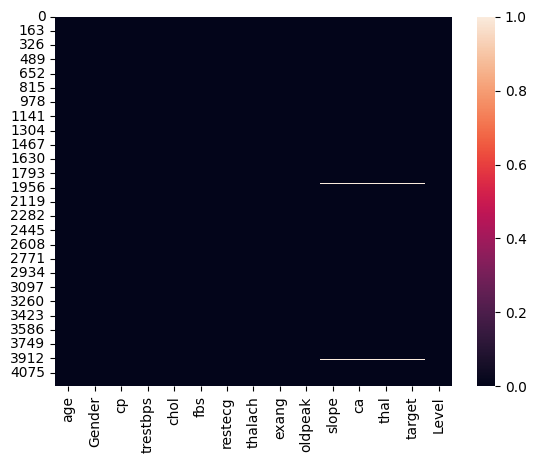

In [845]:
import seaborn as sns
sns.heatmap(heart_data.isnull())

<Axes: xlabel='trestbps', ylabel='count'>

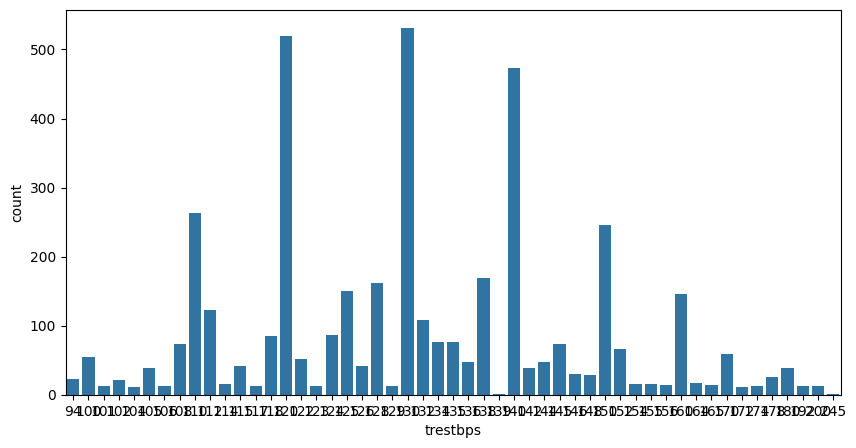

In [846]:
plt.figure(figsize=(10,5))
sns.countplot(x='trestbps',data=heart_data)

<Axes: xlabel='fbs', ylabel='count'>

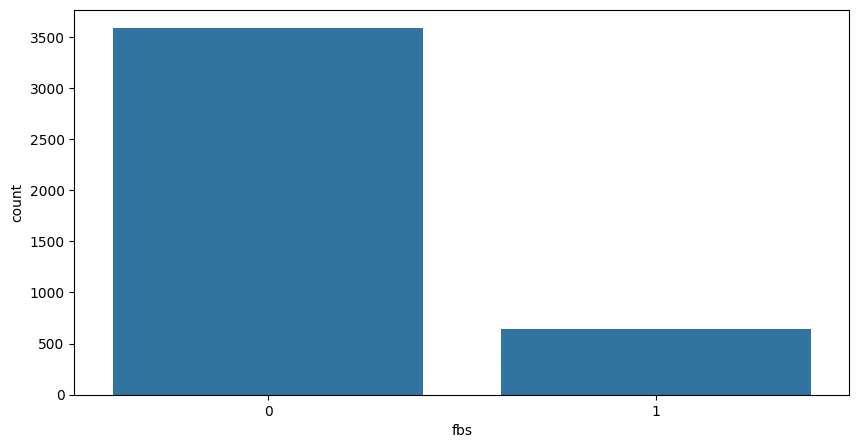

In [847]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs',data = heart_data)

<Axes: xlabel='thalach', ylabel='age'>

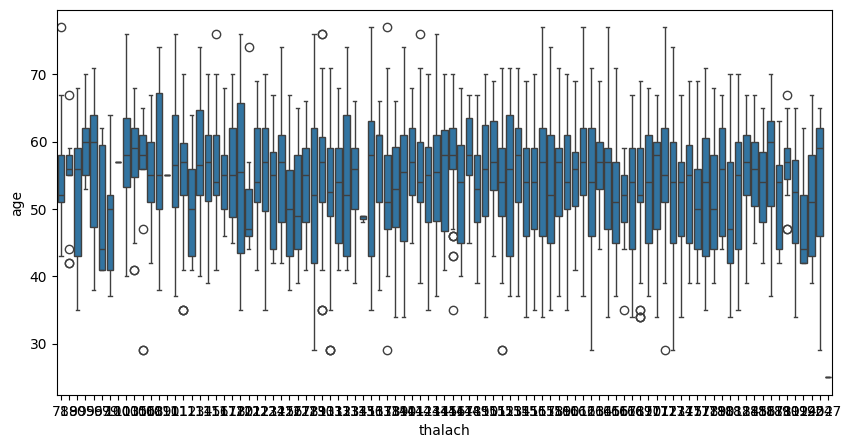

In [848]:
plt.figure(figsize=(10,5))
sns.boxplot(x='thalach',y='age',data = heart_data)

In [849]:
sorted_thalach = heart_data.groupby('age')['thalach'].count().to_frame()

In [850]:
sorted_thalach.style.background_gradient(cmap = 'Reds')

In [851]:
heart_data.style.background_gradient(cmap = 'Reds')

In [852]:
label = heart_data.age.sort_values().unique()       
target = sorted_thalach.thalach

In [853]:
print(label)
print(target)

[25 29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
age
25      1
29     15
34     27
35     48
37     25
38     34
39     50
40     35
41    147
42    117
43    107
44    159
45    124
46    104
47     82
48     84
49     73
50     96
51    168
52    193
53    122
54    216
55    121
56    153
57    234
58    259
59    207
60    150
61    123
62    150
63    135
64    132
65    103
66     90
67    132
68     59
69     35
70     48
71     36
74     13
76     13
77     11
Name: thalach, dtype: int64


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [854]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [855]:
print(X)

      age  Gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      63       1   3       145   233    1        0      150      0      2.3   
1      37       1   2       130   250    0        1      187      0      3.5   
2      41       0   1       130   204    0        0      172      0      1.4   
3      56       1   1       120   236    0        1      178      0      0.8   
4      57       0   0       120   354    0        1      163      1      0.6   
...   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
4226   59       1   2       130   131    0        1      115      1      1.2   
4227   41       1   2       130   236    0        0      174      0      0.0   
4228   54       1   0       144   193    1        1      141      0      3.4   
4229   39       1   2       130   131    0        1      115      1      1.2   
4230   34       1   1       130   236    0        0      174      0      0.0   

      slope   ca  thal  Level  
0      

In [856]:
print(Y)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4226    0.0
4227    0.0
4228    1.0
4229    1.0
4230    1.0
Name: target, Length: 4231, dtype: float64


Splitting the Data into Training data & Test Data

In [857]:
import pandas as pd
print(Y.isna().sum())


30


In [858]:
# Impute NaN values with mean
Y.fillna(Y.mean(), inplace=True)

# Or, remove rows with NaN values
Y.dropna(inplace=True)


In [859]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [860]:
print(X.shape, X_train.shape, X_test.shape)

(4231, 14) (3384, 14) (847, 14)


Model Training

Logistic Regression

In [861]:
model = LogisticRegression()

In [862]:
X_encoded = pd.get_dummies(X)

In [863]:
import pandas as pd

# Assuming X_train is a DataFrame
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]  # Ensure that Y_train is aligned with X_train


In [864]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train = imputer.fit_transform(X_train)


In [865]:
# training the LogisticRegression model with Training data
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()

# Train the model
model.fit(X_train, Y_train)


HistGradientBoostingClassifier()

Model Evaluation

Accuracy Score

In [866]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [867]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9985119047619048


In [868]:
print(Y_test)
print(Y_test.unique())


603     1.0
2281    1.0
431     1.0
571     1.0
1006    1.0
       ... 
2330    1.0
4181    0.0
3851    0.0
2710    0.0
1056    1.0
Name: target, Length: 847, dtype: float64
[1.         0.         0.55343966]


In [869]:
Y_test = Y_test.apply(lambda x: 1 if x >= 0.5 else 0)  # Example thresholding


In [870]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

C:\Users\taffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but HistGradientBoostingClassifier was fitted without feature names



In [871]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9763872491145218


In [872]:
import plotly.graph_objects as go

In [873]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=label,y=target,mode='markers+lines'))
fig.update_layout(title = 'Hearth Diseases',xaxis=dict(title='Age'),yaxis=dict(title=' trestbps'))
fig.show()

## RandomForest Classification

In [874]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np 
acc_dict = {}
# create the data
X = heart_data.drop('Level',axis = 1)
y = heart_data['Level']
X_train, X_test, y_train, y_test = train_test_split(X,y)

Accuracy score :  60.77504725897921


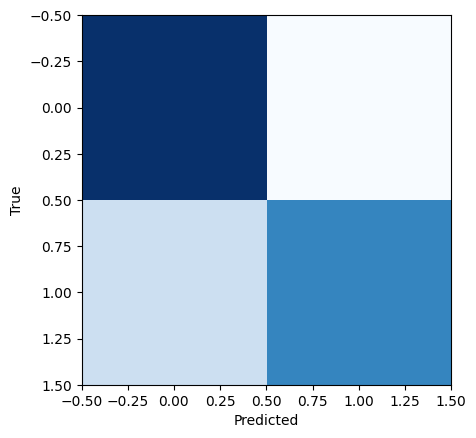

In [875]:
from sklearn.ensemble import  RandomForestClassifier
# create model
model = RandomForestClassifier()

# fit the data in the model
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## KNeighbourClassification

Best k is 1 with score 0.5534201277561779
Accuracy score: 60.68052930056711
Log Loss: 14.172173733339068
F1 Score: 0.6064629705193587


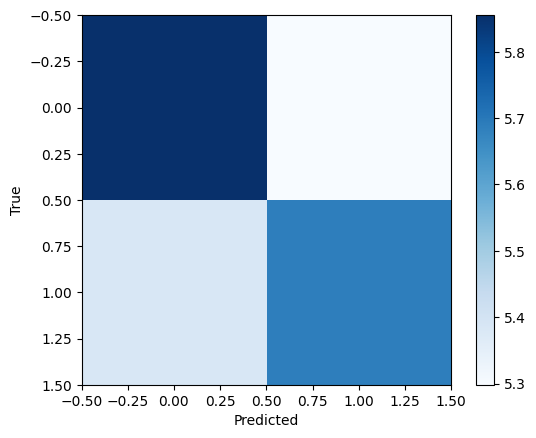

In [876]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary to store results
acc_dict = {}

# Assuming X_train, y_train, X_test, y_test are already defined
# Preprocessing: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Using StratifiedKFold to handle imbalanced datasets
cv_splits = StratifiedKFold(n_splits=min(5, len(np.unique(y_train))), shuffle=True, random_state=42)

# Find the best k
highscore = 0
bestk = 0

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_imputed, y_train, cv=cv_splits)
    score = scores.mean()
    if score > highscore:
        highscore = score
        bestk = k

print('Best k is {} with score {}'.format(bestk, highscore))

# Train the best KNN model
knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train_imputed, y_train)

# Prediction
y_predict = knn.predict(X_test_imputed)
print('Accuracy score:', accuracy_score(y_test, y_predict) * 100)

# Calculate and store log loss and F1 score
acc_dict['KNN_log_loss'] = log_loss(y_test, y_predict)
acc_dict['KNN_F1_Score'] = f1_score(y_test, y_predict, average='weighted')

# Print results
print('Log Loss:', acc_dict['KNN_log_loss'])
print('F1 Score:', acc_dict['KNN_F1_Score'])

# Prediction visualization
plt.imshow(np.log1p(confusion_matrix(y_test, y_predict)), cmap='Blues', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.colorbar()
plt.show()


## KMean Clustering

Accuracy score: 11.342155009451796
Log Loss: 18.566910299687
F1 Score: 0.17615385804930245


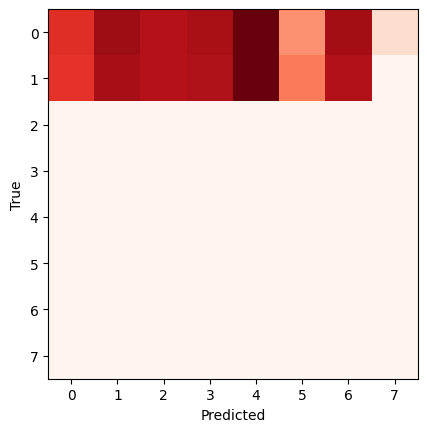

In [877]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary to store results
acc_dict = {}

# Assuming X_train, y_train, X_test, y_test are already defined
# Preprocessing: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train KMeans
clf = KMeans()
clf.fit(X_train_imputed)

# Prediction
maxx = clf.predict(X_test_imputed)

# Calculate accuracy score
accuracy = accuracy_score(y_test, maxx) * 100
print('Accuracy score:', accuracy)

# Calculate and store log loss and F1 score
acc_dict['kMeans_log_loss'] = log_loss(y_test, maxx)
acc_dict['kMeans_F1_Score'] = f1_score(y_test, maxx, average='weighted')

# Print results
print('Log Loss:', acc_dict['kMeans_log_loss'])
print('F1 Score:', acc_dict['kMeans_F1_Score'])

# Prediction visualization
plt.imshow(np.log1p(confusion_matrix(y_test, maxx)), cmap='Reds', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


## Support Vector Classifier

Accuracy score: 51.701323251417776
Log Loss: 17.408607638789096
F1 Score: 0.35240652733365135


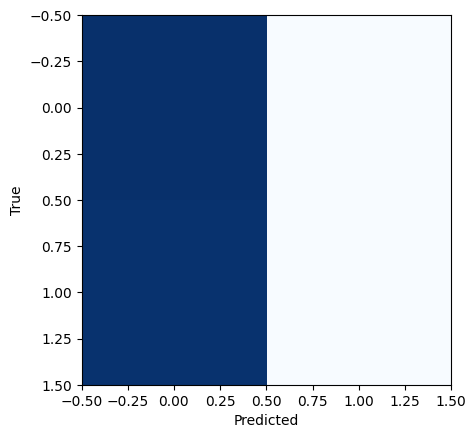

In [878]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary to store results
acc_dict = {}

# Assuming X_train, y_train, X_test, y_test are already defined
# Preprocessing: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train SVC
model = SVC()
model.fit(X_train_imputed, y_train)

# Prediction
y_pred = model.predict(X_test_imputed)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy score:', accuracy)

# Calculate and store log loss and F1 score
acc_dict['svc_log_loss'] = log_loss(y_test, y_pred)
acc_dict['svc_f1_score'] = f1_score(y_test, y_pred, average='weighted')

# Print results
print('Log Loss:', acc_dict['svc_log_loss'])
print('F1 Score:', acc_dict['svc_f1_score'])

# Prediction visualization
plt.imshow(np.log1p(confusion_matrix(y_test, y_pred)), cmap='Blues', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


In [879]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (3173, 14)
y_train shape: (3173,)


In [880]:
print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())


Missing values in X_train: age          0
Gender       0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope       22
ca          22
thal        22
target       0
dtype: int64
Missing values in y_train: 0


## DecisionTreeClassifier

Accuracy score :  61.62570888468809


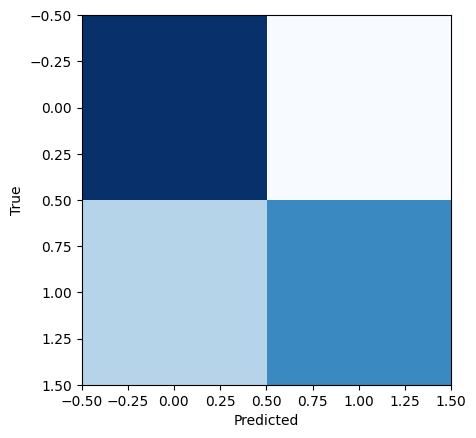

In [881]:
from sklearn.tree import DecisionTreeClassifier
tree_ = DecisionTreeClassifier()
tree_.fit(X_train,y_train)
y_pred = tree_.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['Tree_log_loss'] = log_loss(y_test,y_pred)
acc_dict['Tree_f!1_score'] = f1_score(y_test,y_pred)


# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [882]:
# number of rows and Columns in this dataset
heart_data.shape

(4231, 15)

In [883]:
# getting the statistical measures of the data
heart_data.describe()

age       Gender           cp     trestbps         chol  \
count  4231.000000  4231.000000  4231.000000  4231.000000  4231.000000   
mean     54.288584     0.705507     0.941385   131.944221   245.917041   
std       8.920063     0.455868     1.019603    17.261997    52.124904   
min      25.000000     0.000000     0.000000    94.000000   126.000000   
25%      47.000000     0.000000     0.000000   120.000000   211.000000   
50%      55.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   274.000000   
max      77.000000     1.000000     3.000000   245.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  4231.000000  4231.000000  4231.000000  4231.000000  4231.000000   
mean      0.152446     0.549279   149.033089     0.338218     1.070196   
std       0.359495     0.523553    22.766651     0.473159     1.169540   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.500000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   165.000000     1.000000     1.800000   
max       1.000000     2.000000   247.000000     1.000000     6.200000   

             slope           ca         thal       target        Level  
count  4201.000000  4201.000000  4201.000000  4231.000000  4231.000000  
mean      1.401809     0.743156     2.332540     0.553440     0.484755  
std       0.614845     1.015108     0.613429     0.495429     0.499827  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000     0.000000  
75%       2.000000     1.000000     3.000000     1.000000     1.000000  
max       3.000000     4.000000     3.000000     1.000000     1.000000

In [884]:
import numpy as np

input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
input_data_with_placeholder = input_data + (0,)
input_data_as_numpy_array = np.asarray(input_data_with_placeholder)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


[0]
The Person does not have a Heart Disease


Building a Predictive System

In [885]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


Saving the trained model

In [886]:
import pickle

In [887]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [888]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [889]:
for column in X.columns:
  print(column)

age
Gender
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


# Accuracy Report

|   Algorithm                 | Accuracy score |      
|-----------------------------|-------------------|
|    RFC                      |      85.22        |       
|    KNN                      |      76.43        |            
|    SVC                      |      71.43        | 
|    DecisionTreeClassifier   |      70.00        |      
